# WORKING NOTEBOOK - JF
<br>

## Exploring MOVIE GROSS CSV

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# df = pd.read_csv('zippedData/bom.movie_gross.csv')
# df

In [3]:
# df.info()

In [4]:
#Seems like there are a lot fo null values in 'foreign_gross' column
#A few in 'studio' and 'doemstic_gross'

In [5]:
# df[df['domestic_gross'].isna()]

In [6]:
# df[df['foreign_gross'].isna()]

In [7]:
# df.sort_values(by='domestic_gross', ascending=False)

In [8]:
# df_studio_vc = df['studio'].value_counts()

In [9]:
# df_studio_vc.loc[df_studio_vc  20]

In [10]:
#REPLACING NULL VALUES IN FOREIGN_GROSS WITH "0"?
#df['foreign_gross'] = df['foreign_gross'].fillna(0)
#df['foreign_gross']

In [11]:
#CREATING NEW COLUMN TO DIFFERENTIATE BETWEEN MOVIES BETWEEN THAT AIRED ONLY DOMESTICALLY
#df['Foreign_Release'] = np.where(df['foreign_gross'] == 0, True, False)

# Merging the budget dataframe with the IMDB data pulled from SQL

In [ ]:
#imports and connect to SQL
import pandas as pd
import sqlite3
import pandasql
import matplotlib.pyplot as plt


conn = sqlite3.connect('zippedData/im.db')

In [13]:
#creating a dataframe with the info we want to take from the imdb database
imdb_ratings = pd.read_sql(
    """
    SELECT basics.movie_id, basics.primary_title, basics.original_title, basics.runtime_minutes, basics.genres, ratings.averagerating, ratings.numvotes
    FROM movie_basics as basics
        JOIN movie_ratings as ratings
            USING(movie_id)
    """, conn
)

In [14]:
budget_cleaned = pd.read_csv('../zippedData/success.csv')

In [15]:
#removing duplicates from the movie title column in each dataframe before merging them
imdb_ratings = imdb_ratings.drop_duplicates(subset=['primary_title'])
budget_cleaned = budget_cleaned.drop_duplicates(subset=['movie'])


In [16]:
all_movie_data = pd.merge(budget_cleaned, imdb_ratings, left_on='movie', right_on='primary_title', how='inner')


In [17]:
#duplicates sanity check
all_movie_data['movie'].duplicated().value_counts()

False    984
Name: movie, dtype: int64

# Production Budget EDA

In [18]:
all_movie_data

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,year,movie_id,primary_title,original_title,runtime_minutes,genres,averagerating,numvotes
0,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624
1,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594
2,6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,6.827114,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926
3,8,9,2017-11-17,Justice League,300000000,229024295,655945209,2.186484,2017,tt0974015,Justice League,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135
4,9,10,2015-11-06,Spectre,300000000,200074175,879620923,2.932070,2015,tt2379713,Spectre,Spectre,148.0,"Action,Adventure,Thriller",6.8,352504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,5672,73,2012-06-15,Your Sister's Sister,120000,1597486,3090593,25.754942,2012,tt1742336,Your Sister's Sister,Your Sister's Sister,90.0,"Comedy,Drama",6.7,24780
980,5679,80,2015-07-10,The Gallows,100000,22764410,41656474,416.564740,2015,tt2309260,The Gallows,The Gallows,81.0,"Horror,Mystery,Thriller",4.2,17763
981,5685,86,2017-07-07,A Ghost Story,100000,1594798,2769782,27.697820,2017,tt6265828,A Ghost Story,A Ghost Story,92.0,"Drama,Fantasy,Romance",6.8,46280
982,5737,38,2016-03-18,Krisha,30000,144822,144822,4.827400,2016,tt4266638,Krisha,Krisha,83.0,Drama,7.2,5917


In [19]:
import numpy as np

In [20]:
df1 = all_movie_data

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            984 non-null    int64  
 1   id                    984 non-null    int64  
 2   release_date          984 non-null    object 
 3   movie                 984 non-null    object 
 4   production_budget     984 non-null    int64  
 5   domestic_gross        984 non-null    int64  
 6   worldwide_gross       984 non-null    int64  
 7   return_on_investment  984 non-null    float64
 8   year                  984 non-null    int64  
 9   movie_id              984 non-null    object 
 10  primary_title         984 non-null    object 
 11  original_title        984 non-null    object 
 12  runtime_minutes       978 non-null    float64
 13  genres                982 non-null    object 
 14  averagerating         984 non-null    float64
 15  numvotes              9

In [22]:
# create a list of our conditions
conditions = [
    (df1['production_budget'] <= 7500000),
    (df1['production_budget'] > 7500000) & (df1['production_budget'] <= 11000000),
    (df1['production_budget'] > 11000000) & (df1['production_budget'] <= 15000000),
    (df1['production_budget'] > 15000000) & (df1['production_budget'] < 100000000),
    (df1['production_budget'] > 100000000)]

# create a list of the values we want to assign for each condition
values = ['tier_1', 'tier_2', 'tier_3', 'tier_4', 'high_end']

# create a new column and use np.select to assign values to it using our lists as arguments
df1['budget_tier'] = np.select(conditions, values)

# display updated DataFrame
df1

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,year,movie_id,primary_title,original_title,runtime_minutes,genres,averagerating,numvotes,budget_tier
0,1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,2011,tt1298650,Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,136.0,"Action,Adventure,Fantasy",6.6,447624,high_end
1,3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,2015,tt2395427,Avengers: Age of Ultron,Avengers: Age of Ultron,141.0,"Action,Adventure,Sci-Fi",7.3,665594,high_end
2,6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,6.827114,2018,tt4154756,Avengers: Infinity War,Avengers: Infinity War,149.0,"Action,Adventure,Sci-Fi",8.5,670926,high_end
3,8,9,2017-11-17,Justice League,300000000,229024295,655945209,2.186484,2017,tt0974015,Justice League,Justice League,120.0,"Action,Adventure,Fantasy",6.5,329135,high_end
4,9,10,2015-11-06,Spectre,300000000,200074175,879620923,2.932070,2015,tt2379713,Spectre,Spectre,148.0,"Action,Adventure,Thriller",6.8,352504,high_end
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,5672,73,2012-06-15,Your Sister's Sister,120000,1597486,3090593,25.754942,2012,tt1742336,Your Sister's Sister,Your Sister's Sister,90.0,"Comedy,Drama",6.7,24780,tier_1
980,5679,80,2015-07-10,The Gallows,100000,22764410,41656474,416.564740,2015,tt2309260,The Gallows,The Gallows,81.0,"Horror,Mystery,Thriller",4.2,17763,tier_1
981,5685,86,2017-07-07,A Ghost Story,100000,1594798,2769782,27.697820,2017,tt6265828,A Ghost Story,A Ghost Story,92.0,"Drama,Fantasy,Romance",6.8,46280,tier_1
982,5737,38,2016-03-18,Krisha,30000,144822,144822,4.827400,2016,tt4266638,Krisha,Krisha,83.0,Drama,7.2,5917,tier_1


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 983
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            984 non-null    int64  
 1   id                    984 non-null    int64  
 2   release_date          984 non-null    object 
 3   movie                 984 non-null    object 
 4   production_budget     984 non-null    int64  
 5   domestic_gross        984 non-null    int64  
 6   worldwide_gross       984 non-null    int64  
 7   return_on_investment  984 non-null    float64
 8   year                  984 non-null    int64  
 9   movie_id              984 non-null    object 
 10  primary_title         984 non-null    object 
 11  original_title        984 non-null    object 
 12  runtime_minutes       978 non-null    float64
 13  genres                982 non-null    object 
 14  averagerating         984 non-null    float64
 15  numvotes              9

In [24]:
df1['budget_tier'].value_counts()

tier_4      468
tier_1      187
high_end    175
tier_3       76
tier_2       68
0            10
Name: budget_tier, dtype: int64

In [25]:
df_high_end = df1.loc[df1['budget_tier'] == 'high_end']
df_tier4 = df1.loc[df1['budget_tier'] == 'tier_4']
df_tier3 = df1.loc[df1['budget_tier'] == 'tier_3']
df_tier2 = df1.loc[df1['budget_tier'] == 'tier_2']
df_tier1 = df1.loc[df1['budget_tier'] == 'tier_1']

In [26]:
df1.drop(df1[df1['return_on_investment'] == 416.564740].index, inplace = True)


In [27]:
df_high_end['return_on_investment'].describe()

count    175.000000
mean       3.458412
std        1.712223
min        1.000265
25%        2.120859
50%        3.168614
75%        4.277221
max        8.483133
Name: return_on_investment, dtype: float64

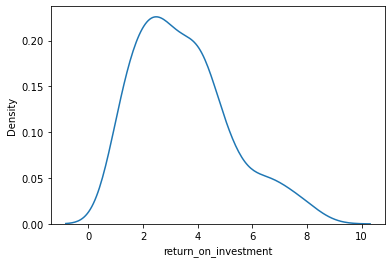

In [28]:
sns.kdeplot(df_high_end['return_on_investment']);

In [29]:
df_tier4['return_on_investment'].describe()

count    468.000000
mean       3.659275
std        3.053796
min        1.007812
25%        1.805754
50%        2.654767
75%        4.226904
max       21.317558
Name: return_on_investment, dtype: float64

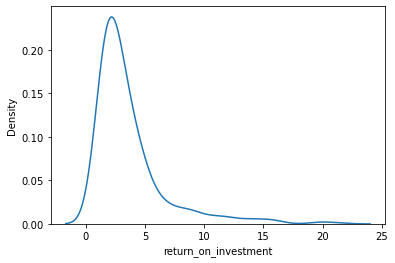

In [30]:
sns.kdeplot(df_tier4['return_on_investment']);

In [31]:
df_tier3['return_on_investment'].describe()

count    76.000000
mean      4.962560
std       4.393866
min       1.002909
25%       1.996057
50%       3.189146
75%       7.201263
max      25.597236
Name: return_on_investment, dtype: float64

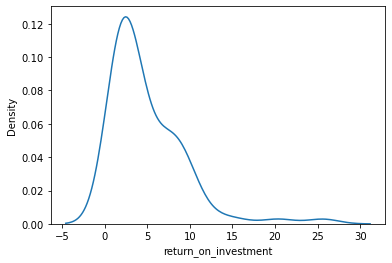

In [32]:
sns.kdeplot(df_tier3['return_on_investment']);

In [33]:
df_tier2['return_on_investment'].describe()

count    68.000000
mean      5.641559
std       5.313995
min       1.020562
25%       2.349576
50%       3.981974
75%       7.040865
max      31.016276
Name: return_on_investment, dtype: float64

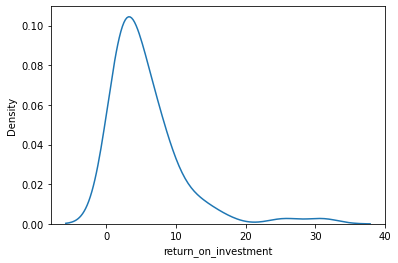

In [34]:
sns.kdeplot(df_tier2['return_on_investment']);

In [70]:
df_tier1['return_on_investment'].describe()

797      1.138534
798      4.214558
799     24.364250
800     12.229174
801     11.500632
          ...    
979     25.754942
980    416.564740
981     27.697820
982      4.827400
983     19.591680
Name: return_on_investment, Length: 187, dtype: float64

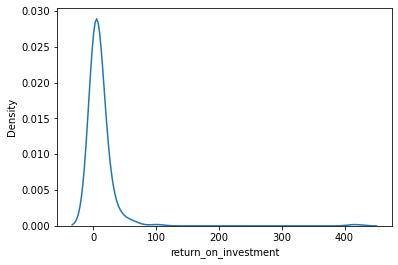

In [36]:
sns.kdeplot(df_tier1['return_on_investment']);

In [37]:
df1.drop(df1[df1['return_on_investment'] == 416.564740].index, inplace = True)


In [38]:
highend_roi_mean = df1.loc[df1['budget_tier'] == 'high_end']['return_on_investment'].mean()
tier4_roi_mean = df1.loc[df1['budget_tier'] == 'tier_4']['return_on_investment'].mean()
tier3_roi_mean = df1.loc[df1['budget_tier'] == 'tier_3']['return_on_investment'].mean()
tier2_roi_mean = df1.loc[df1['budget_tier'] == 'tier_2']['return_on_investment'].mean()
tier1_roi_mean = df1.loc[df1['budget_tier'] == 'tier_1']['return_on_investment'].mean()
print(highend_roi_mean, tier4_roi_mean, tier3_roi_mean, tier2_roi_mean, tier1_roi_mean)

3.458411883048874 3.6592750922790787 4.962560017379813 5.64155868357292 9.500254101396758


In [39]:
#creating a new df for tier ROI means
tier_roi_means = {
    'Tiers':[5,4,3,2,1],
    'ROI_Mean':[highend_roi_mean, tier4_roi_mean, tier3_roi_mean, 
                 tier2_roi_mean, tier1_roi_mean]}
    
scatter_df = pd.DataFrame(tier_roi_means)
print(scatter_df)

   Tiers  ROI_Mean
0      5  3.458412
1      4  3.659275
2      3  4.962560
3      2  5.641559
4      1  9.500254


In [40]:
#plotting imports
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

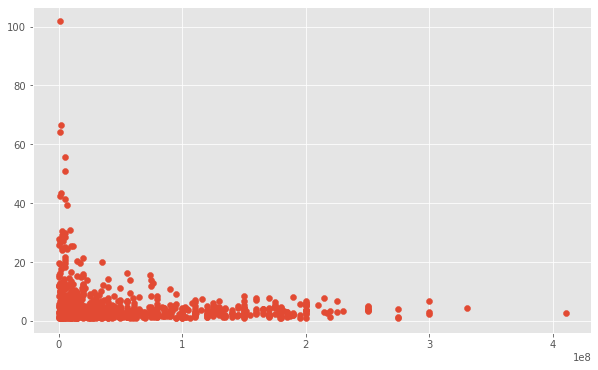

In [41]:
fix, ax = plt.subplots(figsize=(10,6))

ax.scatter(x='production_budget', y='return_on_investment', data=df1);

In [42]:
#find slope 'm'
def slope(x, y):
    rho = np.corrcoef(x, y)[0][1]
    s_y = y.std()
    s_x = x.std()

    m = rho * s_y / s_x
    return m
    
m = slope(df1['production_budget'], df1['return_on_investment'])

In [43]:
#find intercept 'c'
def intercept(m, x, y):
    y_mean = y.mean()
    x_mean = x.mean()

    # calculating intercept estimate
    c = y_mean - m * x_mean
    return c
    
c = intercept(m, df1['production_budget'], df1['return_on_investment'])

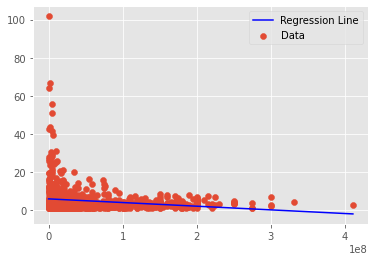

In [44]:
#Plotting the line
def best_fit(x, y):
    # Create a scatter plot of x vs. y
    fig, ax = plt.subplots()
    ax.scatter(x, y, label="Data")

    # Calculate coefficient and intercept
    m = slope(x, y)
    c = intercept(m, x, y)
    
    # Plot line created by coefficient and intercept
    regression_line = m * x + c
    ax.plot(x, regression_line, label= "Regression Line", color='blue')
    ax.legend()
    
best_fit(df1['production_budget'], df1['return_on_investment'])

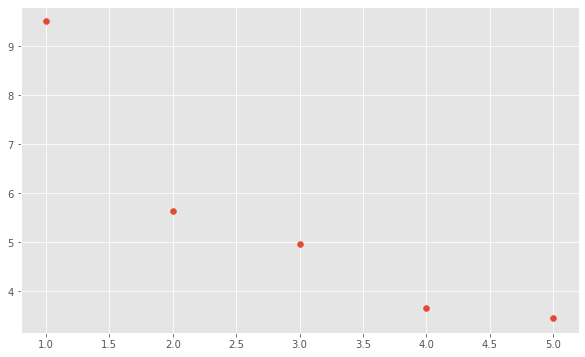

In [45]:
#using means inseatd of raw data
fix, ax = plt.subplots(figsize=(10,6))

ax.scatter(x='Tiers', y='ROI_Mean', data=scatter_df);

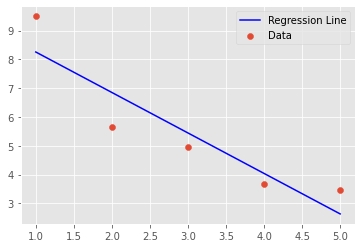

In [46]:
Plotting the line
def best_fit(x, y):
    # Create a scatter plot of x vs. y
    fig, ax = plt.subplots()
    ax.scatter(x, y, label="D#ata")

    # Calculate coefficient and intercept
    m = slope(x, y)
    c = intercept(m, x, y)
    
    # Plot line created by coefficient and intercept
    regression_line = m * x + c
    ax.plot(x, regression_line, label= "Regression Line", color='red')
    ax.get_lines()[0].set_color("blue")
    ax.legend()
    
best_fit(scatter_df['Tiers'], scatter_df['ROI_Mean'])

# ANOVA Test

In [72]:
from scipy import stats

In [74]:
result = stats.f_oneway(df_tier1['return_on_investment'], df_tier2['return_on_investment'], 
                        df_tier3['return_on_investment'], df_tier4['return_on_investment'], df_high_end['return_on_investment'])
result

F_onewayResult(statistic=11.146558437147606, pvalue=7.636720371960759e-09)

# EDA Budget - All ROIs

In [84]:
import pandas as pd
import numpy as np

In [85]:
budget = pd.read_csv('../zippedData/tn.movie_budgets.csv')

In [86]:
#change dates to datetime objects
budget['release_date'] = pd.to_datetime(budget['release_date'])

In [87]:
#remove commas from gross figures
budget = budget.replace(',','', regex=True)

In [88]:
#make this one line if possible
budget['production_budget']= budget['production_budget'].str[1:]
budget['domestic_gross'] = budget['domestic_gross'].str[1:]
budget['worldwide_gross'] = budget['worldwide_gross'].str[1:]

In [89]:
budget[['production_budget', 'domestic_gross', 'worldwide_gross']]= budget[['production_budget', 'domestic_gross', 'worldwide_gross']].astype(int)

In [90]:
budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 271.2+ KB


In [91]:
#Create a new column to determine how much a movie made against its budget
budget["return_on_investment"]= budget['worldwide_gross']/budget['production_budget']


In [94]:
budget['year'] = budget['release_date'].dt.year
budget_recent = budget.loc[budget['year']>2010]
budget_recent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1920 entries, 1 to 5780
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    1920 non-null   int64         
 1   release_date          1920 non-null   datetime64[ns]
 2   movie                 1920 non-null   object        
 3   production_budget     1920 non-null   int64         
 4   domestic_gross        1920 non-null   int64         
 5   worldwide_gross       1920 non-null   int64         
 6   return_on_investment  1920 non-null   float64       
 7   year                  1920 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 135.0+ KB


# MERGE HERE

In [ ]:
#imports and connect to SQL
import pandas as pd
import sqlite3
import pandasql
import matplotlib.pyplot as plt


conn = sqlite3.connect('../zippedData/im.db')

In [93]:
df_all = budget_recent

In [82]:
df_all.drop(df_all[df_all['return_on_investment'] == 416.564740].index, inplace = True)
df_all.drop(df_all[df_all['return_on_investment'] == 101.759490].index, inplace = True)

/Users/jf/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/Users/jf/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [83]:
df_all.describe()

,id,production_budget,domestic_gross,worldwide_gross,return_on_investment,year
count,1918.000000,1.918000e+03,1.918000e+03,1.918000e+03,1918.000000,1918.000000
mean,50.913452,3.702384e+07,4.519635e+07,1.152861e+08,3.018730,2014.383733
std,28.575259,5.235676e+07,8.187301e+07,2.214436e+08,5.304202,2.280942
min,1.000000,1.400000e+03,0.000000e+00,0.000000e+00,0.000000,2011.000000
25%,27.000000,4.000000e+06,4.661500e+04,8.984090e+05,0.199660,2012.000000
50%,51.000000,1.700000e+07,1.347721e+07,2.855919e+07,1.611241,2014.000000
75%,76.000000,4.287500e+07,5.420593e+07,1.182423e+08,3.628817,2016.000000
max,100.000000,4.106000e+08,9.366622e+08,2.053311e+09,66.580591,2020.000000


In [80]:
# create a list of our conditions
conditions = [
    (df_all['production_budget'] <= 4000000),
    (df_all['production_budget'] > 4000000) & (df_all['production_budget'] <= 17000000),
    (df_all['production_budget'] > 17000000) & (df_all['production_budget'] <= 42000000),
    (df_all['production_budget'] > 42000000)]

# create a list of the values we want to assign for each condition
values = ['tier_1', 'tier_2', 'tier_3', 'tier_4']

# create a new column and use np.select to assign values to it using our lists as arguments
df_all['budget_tier'] = np.select(conditions, values)

# display updated DataFrame
df_all

<ipython-input-80-1760769755c5>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['budget_tier'] = np.select(conditions, values)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,return_on_investment,year,budget_tier
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2.546673,2011,tier_4
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,0.427892,2019,tier_4
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,4.243841,2015,tier_4
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,4.153696,2017,tier_4
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,6.710167,2015,tier_4
...,...,...,...,...,...,...,...,...,...
5761,62,2014-12-31,Stories of Our Lives,15000,0,0,0.000000,2014,tier_1
5771,72,2015-05-19,Family Motocross,10000,0,0,0.000000,2015,tier_1
5772,73,2012-01-13,Newlyweds,9000,4584,4584,0.509333,2012,tier_1
5777,78,2018-12-31,Red 11,7000,0,0,0.000000,2018,tier_1


In [59]:
all_tier4 = df_all.loc[df_all['budget_tier'] == 'tier_4']
all_tier3 = df_all.loc[df_all['budget_tier'] == 'tier_3']
all_tier2 = df_all.loc[df_all['budget_tier'] == 'tier_2']
all_tier1 = df_all.loc[df_all['budget_tier'] == 'tier_1']

In [81]:
all_tier4['return_on_investment'].describe()

count    762.000000
mean       2.700516
std        2.867342
min        0.000000
25%        0.823850
50%        2.023248
75%        3.437075
max       21.317558
Name: return_on_investment, dtype: float64

In [62]:
all_tier3['return_on_investment'].describe()

count    127.000000
mean       3.461962
std        4.199202
min        0.000000
25%        0.705687
50%        2.020304
75%        4.168737
max       25.597236
Name: return_on_investment, dtype: float64

In [63]:
all_tier2['return_on_investment'].describe()

count    156.000000
mean       3.415772
std        5.654212
min        0.000000
25%        0.248235
50%        1.194107
75%        4.944799
max       44.895652
Name: return_on_investment, dtype: float64

In [64]:
all_tier1['return_on_investment'].describe()

count    655.000000
mean       3.272210
std        8.684769
min        0.000000
25%        0.000000
50%        0.117508
75%        2.466313
max      101.759490
Name: return_on_investment, dtype: float64

In [75]:
result = stats.f_oneway(all_tier1['return_on_investment'], all_tier2['return_on_investment'], 
                        all_tier3['return_on_investment'], all_tier4['return_on_investment'], all_high_end['return_on_investment'])
result

F_onewayResult(statistic=1.3894298181568667, pvalue=0.235150605626064)

In [65]:
import seaborn as sns

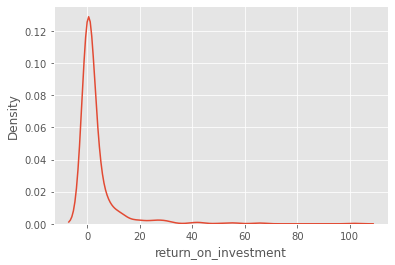

In [66]:
sns.kdeplot(all_tier1['return_on_investment']);

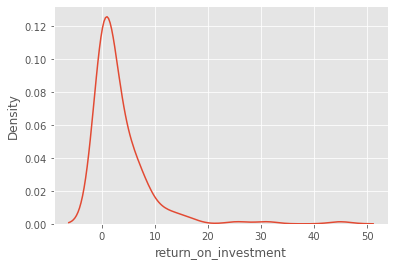

In [67]:
sns.kdeplot(all_tier2['return_on_investment']);